In [1]:
%load_ext lab_black

In [2]:
!tree -L 2 data/aclImdb

data/aclImdb
├── README
├── imdb.vocab
├── imdbEr.txt
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

7 directories, 3 files


In [3]:
from sklearn.datasets import load_files

# Load text files with categories as subfolder names
reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[3]:\n{}".format(text_train[3]))
y_train, y_train.shape

type of text_train: <class 'list'>
length of text_train: 25000
text_train[3]:
b'There are a lot of highly talented filmmakers/actors in Germany now. None of them are associated with this "movie".<br /><br />Why in the world do producers actually invest money in something like this this? You could have made 10 good films with the budget of this garbage! It\'s not entertaining to have seven grown men running around as dwarfs, pretending to be funny. What IS funny though is that the film\'s producer (who happens to be the oldest guy of the bunch) is playing the YOUNGEST dwarf.<br /><br />The film is filled with moments that scream for captions saying "You\'re supposed to laugh now!". It\'s hard to believe that this crap\'s supposed to be a comedy.<br /><br />Many people actually stood up and left the cinema 30 minutes into the movie. I should have done the same instead of wasting my time...<br /><br />Pain!'


(array([1, 0, 1, ..., 0, 0, 0]), (25000,))

In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
import numpy as np

print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [6]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [7]:
bards_words = [
    "The fool doth think he is wise,",
    "but the wise man knows himself to be a fool fool",
]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [9]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))
print("Vocabulary content:\n {}".format(sorted(vect.vocabulary_)))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
Vocabulary content:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [10]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 2 0 1 0 1 1 1 0 1 1]]


In [12]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))
np.array(text_train).shape, X_train.shape

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


((25000,), (25000, 74849))

In [13]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
Features 20010 to 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
Every 2000th feature:
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Mean cross-validation accuracy: 0.88


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.88


In [17]:
# minimum number of documents a token needs to appear
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [18]:
feature_names = vect.get_feature_names_out()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Features 20010 to 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Every 700th feature:
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 't

In [19]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best cross-validation score: 0.89


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['top', 'must', 'our', 'everywhere', 'and', 'still', 'fifteen', 'herein', 'now', 'not', 'behind', 'would', 'throughout', 'again', 'their', 'find', 'wherein', 'un', 'however', 'almost', 'so', 'call', 'these', 'least', 'per', 'every', 'thin', 'me', 'move', 'latterly', 'been', 'could']


In [21]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [22]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best cross-validation score: 0.88


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best cross-validation score: 0.89


In [24]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(feature_names[sorted_by_tfidf[-20:]]))
X_train, max_value

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


(<25000x27271 sparse matrix of type '<class 'numpy.float64'>'
 	with 3354014 stored elements in Compressed Sparse Row format>,
 array([20.15985557, 34.37105041, 16.70816476, ..., 25.46284132,
        28.0047349 ,  9.33491163]))

In [25]:
# We can also find the words that have low inverse document frequency—that is, those
# that appear frequently and are therefore deemed less important. The inverse document
# frequency values found on the training set are stored in the idf_ attribute:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [26]:
import mglearn
import matplotlib.pyplot as plt

(27271,) 1
(27271,)


Text(0.5, 0, 'Feature')

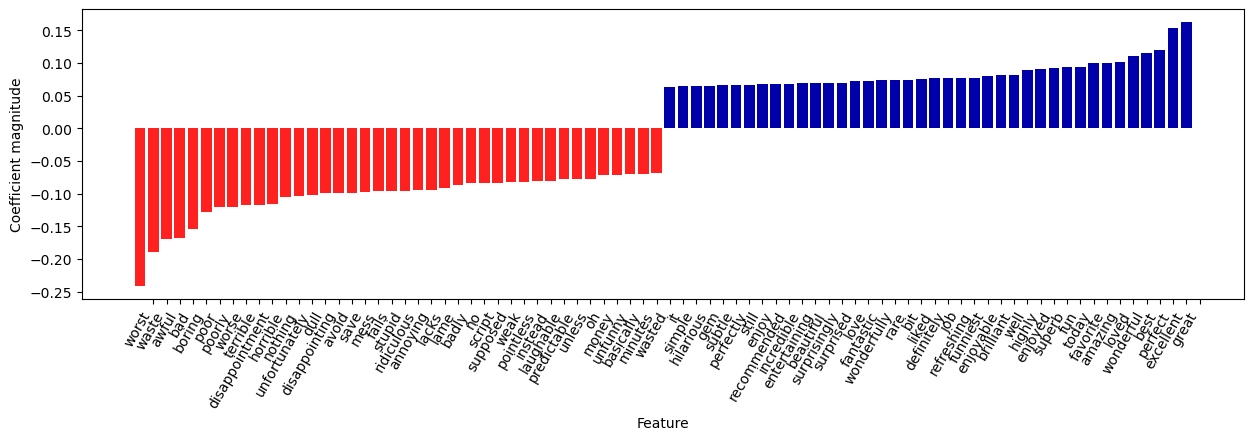

In [27]:
n_top_features = 40
coefficients = grid.best_estimator_.named_steps["logisticregression"].coef_
coefficients = coefficients.squeeze()
print(coefficients.shape, coefficients.ndim)
if coefficients.ndim > 1:
    raise ValueError(
        "coeffients must be 1d array or column vector, got"
        " shape {}".format(coefficients.shape)
    )
coef = coefficients.ravel()
print(coefficients.shape)
if len(coefficients) != len(feature_names):
    raise ValueError(
        "Number of coefficients {} doesn't match number of"
        "feature names {}.".format(len(coefficients), len(feature_names))
    )
# get coefficients with large absolute values
positive_coefficients = np.argsort(coef)[-n_top_features:]
negative_coefficients = np.argsort(coef)[:n_top_features]
interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
# plot them
plt.figure(figsize=(15, 5))
colors = [
    mglearn.cm2(1) if c < 0 else mglearn.cm2(0) for c in coef[interesting_coefficients]
]
plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.subplots_adjust(bottom=0.3)
plt.xticks(
    np.arange(1, 1 + 2 * n_top_features),
    feature_names[interesting_coefficients],
    rotation=60,
    ha="right",
)
plt.ylabel("Coefficient magnitude")
plt.xlabel("Feature")

In [28]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool fool']


In [29]:
# The default is one token long
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 13
Vocabulary:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [30]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 15
Vocabulary:
['be fool' 'but the' 'doth think' 'fool doth' 'fool fool' 'he is'
 'himself to' 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise'
 'think he' 'to be' 'wise man']


In [31]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 0 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 1 0 1 0 1 1 0 1 0 1 1]]


In [32]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 41
Vocabulary:
['be' 'be fool' 'be fool fool' 'but' 'but the' 'but the wise' 'doth'
 'doth think' 'doth think he' 'fool' 'fool doth' 'fool doth think'
 'fool fool' 'he' 'he is' 'he is wise' 'himself' 'himself to'
 'himself to be' 'is' 'is wise' 'knows' 'knows himself' 'knows himself to'
 'man' 'man knows' 'man knows himself' 'the' 'the fool' 'the fool doth'
 'the wise' 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be'
 'to be fool' 'wise' 'wise man' 'wise man knows']


In [33]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)],
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


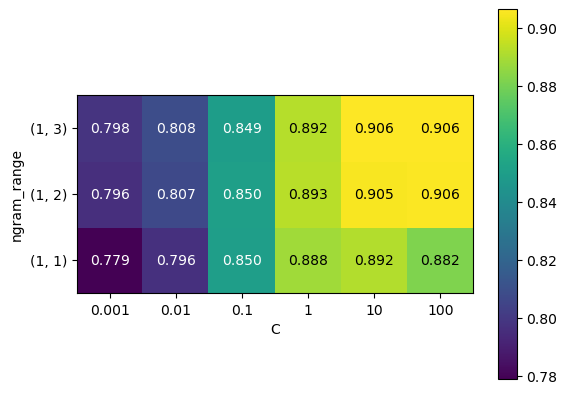

In [34]:
scores = grid.cv_results_["mean_test_score"].reshape(-1, 3).T
xlabel = "C"
ylabel = "ngram_range"
xticklabels = param_grid["logisticregression__C"]
yticklabels = param_grid["tfidfvectorizer__ngram_range"]
ax = plt.gca()
img = ax.pcolor(scores, cmap="viridis")
img.update_scalarmappable()
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)
ax.set_aspect(1)

for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
    x, y = p.vertices[:-2, :].mean(0)
    if np.mean(color[:3]) > 0.5:
        c = "k"
    else:
        c = "w"
    ax.text(x, y, "%0.3f" % value, color=c, ha="center", va="center")
plt.colorbar(img)

{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}

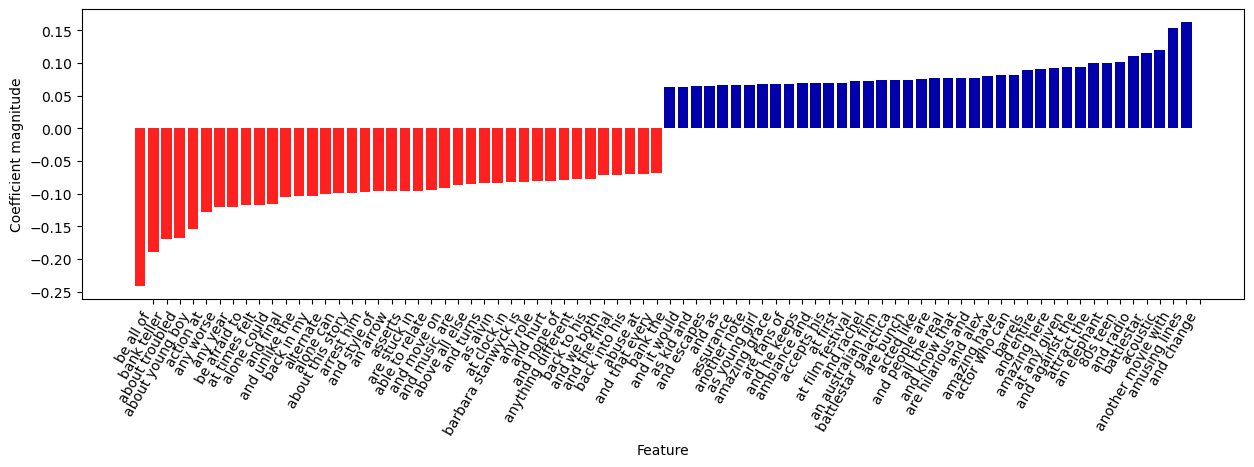

In [35]:
n_top_features = 40
vect = grid.best_estimator_.named_steps["tfidfvectorizer"]
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps["logisticregression"].coef_
coefficients = coefficients.squeeze()
coef = coefficients.ravel()
positive_coefficients = np.argsort(coef)[-n_top_features:]
negative_coefficients = np.argsort(coef)[:n_top_features]
interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
plt.figure(figsize=(15, 5))
colors = [
    mglearn.cm2(1) if c < 0 else mglearn.cm2(0) for c in coef[interesting_coefficients]
]
plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.subplots_adjust(bottom=0.3)
plt.xticks(
    np.arange(1, 1 + 2 * n_top_features),
    feature_names[interesting_coefficients],
    rotation=60,
    ha="right",
)
plt.ylabel("Coefficient magnitude")
plt.xlabel("Feature")
grid.best_params_

In [36]:
vect = CountVectorizer(max_features=10000, max_df=0.15)
X = vect.fit_transform(text_train)

In [37]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=10, learning_method="batch", max_iter=25, random_state=0
)
document_topics = lda.fit_transform(X)

In [38]:
lda.components_.shape

(10, 10000)

In [39]:
# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
sorting, sorting.shape, feature_names, feature_names.shape

(array([[ 994, 9970, 3383, ..., 2401, 9364, 2631],
        [9672, 9900, 9465, ..., 3454,  775, 2891],
        [3764, 9911, 1866, ...,  348,  887,  879],
        ...,
        [1484, 7582, 4903, ..., 2189, 5837, 6654],
        [6561, 7582, 4903, ..., 5897, 3792, 3801],
        [4420, 9873, 3872, ..., 7974, 9607,  887]]),
 (10, 10000),
 array(['00', '000', '10', ..., 'zoom', 'zorro', 'zu'], dtype=object),
 (10000,))

In [40]:
topics = range(10)
topics_per_chunk = 5
n_words = 10
for i in range(0, len(topics), topics_per_chunk):
    these_topics = topics[i : i + topics_per_chunk]
    # maybe we have less than topics_per_chunk left
    len_this_chunk = len(these_topics)
    print(("topic {:<8}" * len_this_chunk).format(*these_topics))
    print(("-------- {0:<5}" * len_this_chunk).format(""))
    for i in range(n_words):
        try:
            print(
                ("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]
                )
            )
        except:
            pass
    print("")

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           

topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horro

In [41]:
lda100 = LatentDirichletAllocation(
    n_components=100, learning_method="batch", max_iter=25, random_state=0
)
document_topics100 = lda100.fit_transform(X)

In [42]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
topics_per_chunk = 7
n_words = 20
for i in range(0, len(topics), topics_per_chunk):
    these_topics = topics[i : i + topics_per_chunk]
    # maybe we have less than topics_per_chunk left
    len_this_chunk = len(these_topics)
    print(("topic {:<8}" * len_this_chunk).format(*these_topics))
    print(("-------- {0:<5}" * len_this_chunk).format(""))
    for i in range(n_words):
        try:
            print(
                ("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]
                )
            )
        except:
            pass
    print("")

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [43]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # show first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

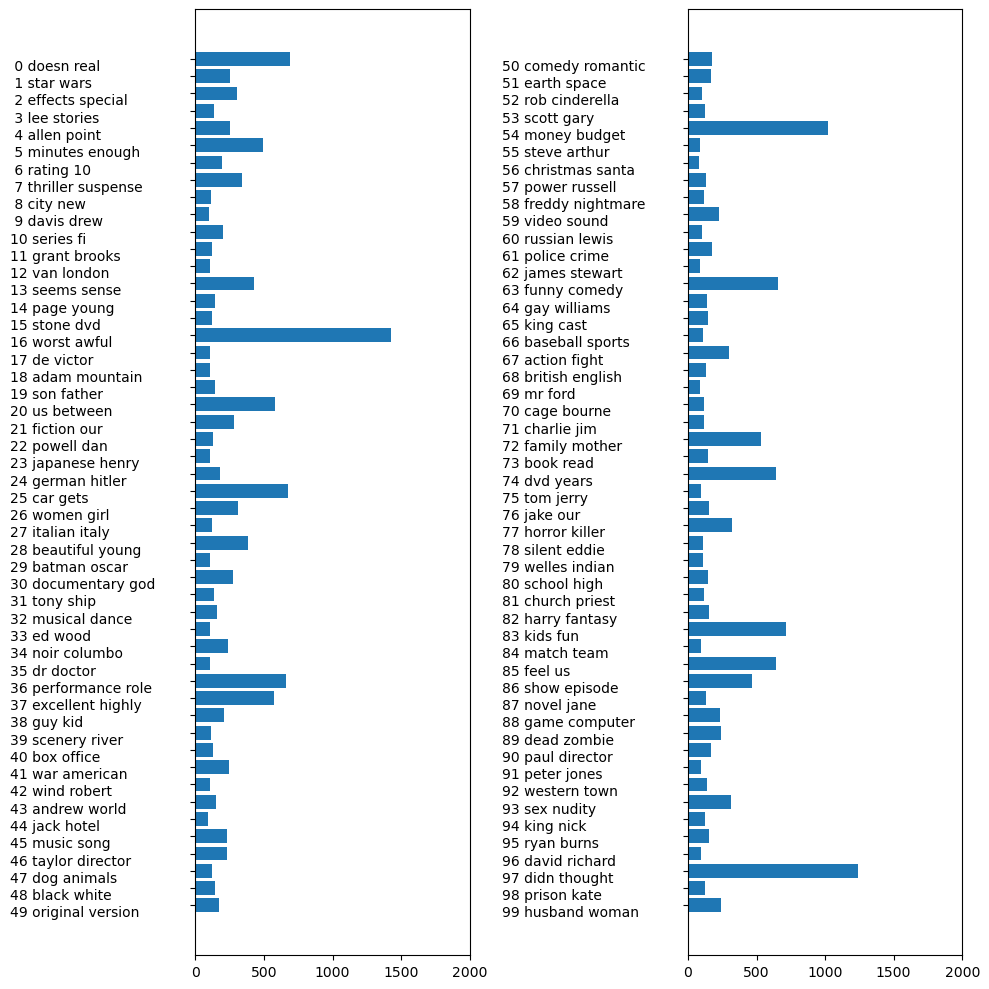

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = [
    "{:>2} ".format(i) + " ".join(words)
    for i, words in enumerate(feature_names[sorting[:, :2]])
]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()